#  Walmart Case Study
## Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import the Walmart Dataset:
df = pd.read_csv("/content/walmart_data.txt")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
# Shape of the DataFrame
df.shape

(550068, 10)

General Info about the Dataset

In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [59]:
df.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


### There are No Null values in the DataFrame

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [7]:
df['Product_ID'].value_counts()

,count
Product_ID,
P00265242,1880
P00025442,1615
P00110742,1612
P00112142,1562
P00057642,1470
...,...
P00325342,1
P00312542,1
P00008942,1


In [8]:
df['Age'].value_counts()

,count
Age,
26-35,219587
36-45,110013
18-25,99660
46-50,45701
51-55,38501
55+,21504
0-17,15102


In [9]:
df['Gender'].value_counts()

,count
Gender,
M,414259
F,135809


In [10]:
df['Purchase'].describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


Out of 5lakh transactions there are only 5891 unique customers

In [11]:
df['User_ID'].nunique()

5891

Number of Unique-Customers as per Gender

In [12]:
df.groupby('Gender')['User_ID'].nunique()

,User_ID
Gender,
F,1666
M,4225


### Lets find the Outliers in the Purchase column

<Axes: xlabel='Purchase'>

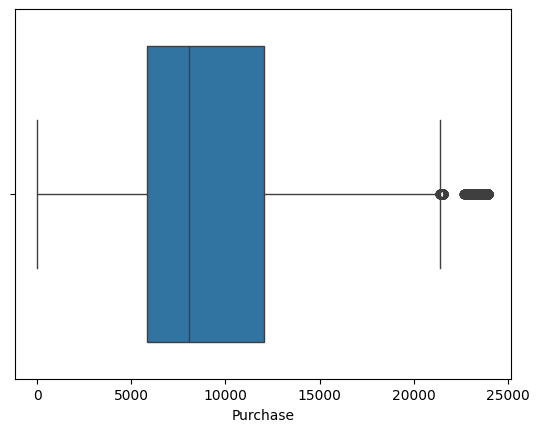

In [63]:
sns.boxplot(x=df['Purchase'])

### We can use IQR Method to remove the outliers but for this we will keep the outliers since only a sample of data was provided to us and to keep the originality of data, we won't be removing them
If we need to remove them we can use the IQR method to remove them as below,  

In [79]:
q1 = df['Purchase'].quantile(0.25) # Finding the First Quartile
q3 = df['Purchase'].quantile(0.75) # Finding the third Quartile
IQR = (q3-q1) # Inter Quartile Range
iqr_df = df.loc[~((df['Purchase']< (q1-(IQR*1.5))) | (df['Purchase']>(q3 + (IQR*1.5))))] # Removing Outlier data
iqr_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [80]:
df.shape

(550068, 10)

In [81]:
iqr_df.shape

(547391, 10)

In [82]:
outliers_count = df.shape[0]-iqr_df.shape[0]
outliers_count

2677

In [83]:
outliers_percentage = (outliers_count/df.shape[0])*100
outliers_percentage

0.4866671029763593

### We have removed 2677 rows from the data since it had outliers which is not so huge
#### After removing outliers we had only 5,47,391 rows in the Sample, Initially we had a total rows of 5,50,068 rows in the sample.  So we have removed only
0.5% of data with the IRQ method.  

##Hence for our analysis we will keep the outliers in our data.


## Gender wise comparison of Purchase - Median values

<Axes: xlabel='Gender', ylabel='Purchase'>

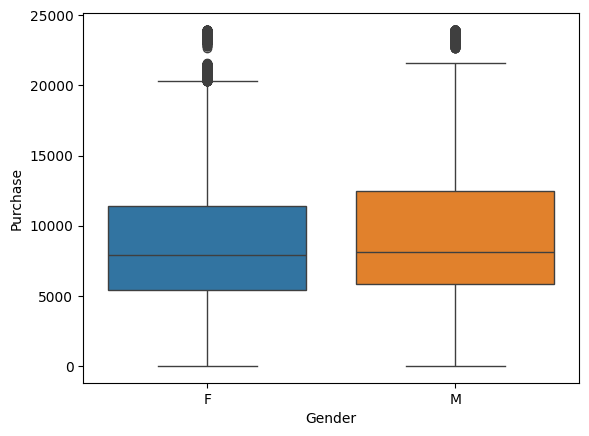

In [13]:
sns.boxplot(x=df['Gender'],y=df['Purchase'],hue=df['Gender'])

# Median of both Male and Female is close to same.


General Statistics on Purchase Value - Gender wise

In [14]:
(df.groupby('Gender')['Purchase']).describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


<Axes: xlabel='Gender', ylabel='Purchase'>

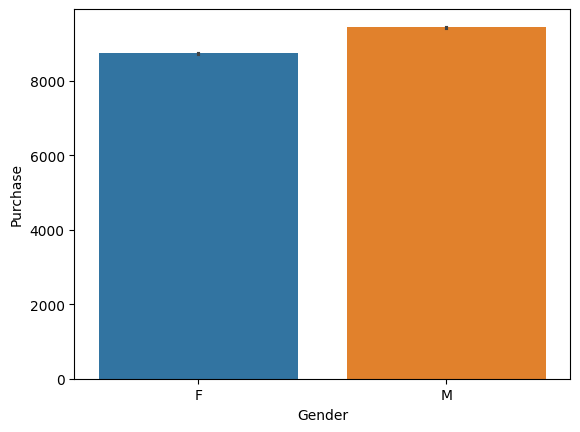

In [15]:
sns.barplot(x='Gender',y='Purchase',hue = 'Gender', data=df)

Total Purchase Value - Gender Wise
It shows male has spend more amount than Female but still we can't declare that the average spend of male is higher than female without proper analysis

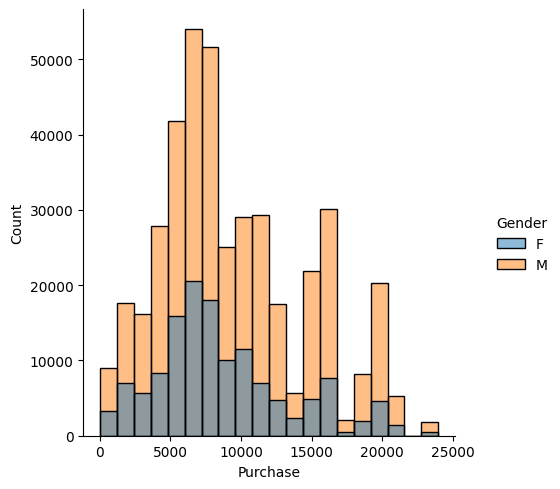

In [16]:
sns.displot(x='Purchase',hue='Gender',data=df,bins=20)

create separate Dataframe for Male and Female Purchases:

In [17]:
male_df = df[df['Gender']=='M']
female_df = df[df['Gender']=='F']

Do a Sample size of 300 on gender wise Purchases to calculate the sample mean of male and female

In [18]:
df.sample(300).groupby('Gender')['Purchase'].mean()

,Purchase
Gender,
F,8467.315068
M,9582.453744


## We take a sample size of 300 and calculate the Sample mean and do sampling for 1000 times

In [19]:
male_sample_mean = []
for i in range(1000):
  sample= male_df.sample(300)['Purchase'].mean()
  male_sample_mean.append(sample)
male_sample_mean

[np.float64(9867.863333333333),
 np.float64(9435.206666666667),
 np.float64(9553.876666666667),
 np.float64(9039.816666666668),
 np.float64(8933.753333333334),
 np.float64(9189.296666666667),
 np.float64(9361.476666666667),
 np.float64(9788.563333333334),
 np.float64(9505.853333333333),
 np.float64(9817.71),
 np.float64(9666.52),
 np.float64(9369.54),
 np.float64(9502.376666666667),
 np.float64(9222.96),
 np.float64(9815.653333333334),
 np.float64(9197.46),
 np.float64(9191.383333333333),
 np.float64(9506.9),
 np.float64(9154.606666666667),
 np.float64(9485.793333333333),
 np.float64(9917.69),
 np.float64(9633.19),
 np.float64(9981.22),
 np.float64(9267.886666666667),
 np.float64(9642.656666666666),
 np.float64(9300.29),
 np.float64(9607.396666666667),
 np.float64(8899.463333333333),
 np.float64(9665.313333333334),
 np.float64(9257.546666666667),
 np.float64(10005.686666666666),
 np.float64(9138.413333333334),
 np.float64(9368.77),
 np.float64(9283.37),
 np.float64(9849.42),
 np.float6

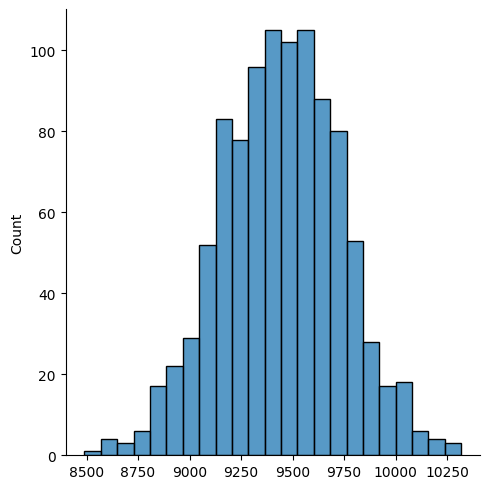

In [20]:
sns.displot(x=male_sample_mean)

## Sampling Mean Distribution follows Noramal Distribution.

Follow the same process for Female as well

In [21]:
female_sample_mean=[]
for i in range(1000):
  sample = female_df.sample(300)['Purchase'].mean()
  female_sample_mean.append(sample)
female_sample_mean

[np.float64(8821.543333333333),
 np.float64(9060.89),
 np.float64(8635.98),
 np.float64(8711.593333333334),
 np.float64(8677.306666666667),
 np.float64(8663.253333333334),
 np.float64(9093.53),
 np.float64(8970.736666666666),
 np.float64(8969.516666666666),
 np.float64(8737.26),
 np.float64(8558.063333333334),
 np.float64(8689.2),
 np.float64(8765.77),
 np.float64(8581.113333333333),
 np.float64(8675.823333333334),
 np.float64(9171.486666666666),
 np.float64(8328.366666666667),
 np.float64(8523.29),
 np.float64(8774.48),
 np.float64(8954.646666666667),
 np.float64(8586.806666666667),
 np.float64(8930.593333333334),
 np.float64(8751.383333333333),
 np.float64(8399.67),
 np.float64(8926.703333333333),
 np.float64(9090.55),
 np.float64(9096.493333333334),
 np.float64(8241.906666666666),
 np.float64(8468.683333333332),
 np.float64(8695.29),
 np.float64(8787.873333333333),
 np.float64(8961.226666666667),
 np.float64(9370.733333333334),
 np.float64(8776.463333333333),
 np.float64(8472.7),
 n

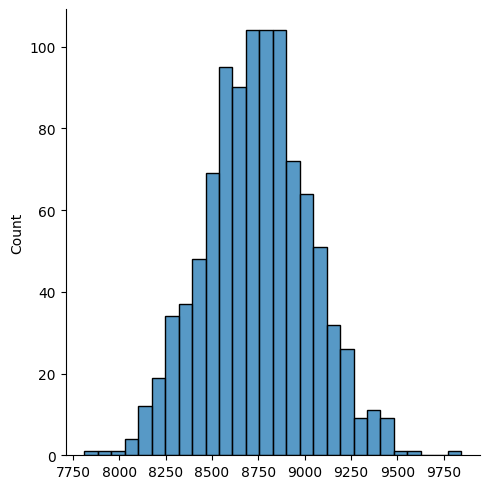

In [22]:
sns.displot(x=female_sample_mean)

Sampling Mean Distribution follows Normal Distribution  

### Calculate the Confidence Interval for Male and Female to find the Average Purchase amount

In [23]:
# for a 95% confident interval, we need 2.5 pecentile and 97.5 percentile
male_ci = np.percentile(male_sample_mean,[2.5,97.5])
female_ci =  np.percentile(female_sample_mean,[2.5,97.5])
male_ci,female_ci

(array([ 8856.76958333, 10017.01683333]),
 array([8197.85416667, 9305.14408333]))

for a 95% confidence Interval with sample size of 300 for male is 8861 to 10017 and for female is 8204 to 9296. both of them are overlapping with each other  

## Hence we create a function to calculate the Confidence Interval for various samples and number of sampling done:


In [24]:
# n --> Sample Size
# iteration --> Number of Sampling
def confidence_interval(n,iteration):
  male_sample_mean=[]
  female_sample_mean=[]
  for i in range(iteration):
    male_sample = male_df.sample(n)['Purchase'].mean()
    female_sample = female_df.sample(n)['Purchase'].mean()
    male_sample_mean.append(male_sample)
    female_sample_mean.append(female_sample)
  male_ci = np.percentile(male_sample_mean,[2.5,97.5])
  female_ci = np.percentile(female_sample_mean,[2.5,97.5])
  print(f"Female: {female_ci}, Male: {male_ci}")

In [25]:
# We can try the same with sample size of 500 for confidence level of 95%
confidence_interval(500,1000)

Female: [8348.8662  9126.28745], Male: [8999.7529 9847.4368]


for a sample size of 500, with 1000 times sampling, Avg mean of female lies between 8339 and 9159 and for Male is 9004 to 9882. Both the range are overlapping hence we will try to increase the sample size.

In [26]:
#sample size of 1000 for confidene level of 95%
confidence_interval(1000,1000)

Female: [8453.6615 9038.4519], Male: [9082.015525 9755.62285 ]


for a sample size of 1000 with sampling times - 1000, confidence Interval - Avg mean of purchase for female lies between 8447 and 9062 and for male lies between 9120 and 9767.  With this we conclude that Male Avg spending is higher than Female

## Create a Function to find the confidence Interval for the given sample size, sampling time and confidence level

In [27]:
# n --> Sample Size
# iteration --> Number of times Sampling
# ci --> Confidence Leval
def confidence_interval(n,iteration,ci):
  male_sample_mean=[]
  female_sample_mean=[]
  for i in range(iteration):
    male_sample = male_df.sample(n)['Purchase'].mean()
    female_sample = female_df.sample(n)['Purchase'].mean()
    male_sample_mean.append(male_sample)
    female_sample_mean.append(female_sample)
  first = (100-ci)/2
  last = 100-first
  male_ci = np.percentile(male_sample_mean,[first,last])
  female_ci = np.percentile(female_sample_mean,[first,last])
  print(f"Female: {female_ci}, Male: {male_ci}")

## Lets try the same for confidence level of 90%
### with sample size of 300 with iteration - 1000

In [28]:
# We can try the same for confidence Interval 90%
# sample size of 300 with iteration - 1000
confidence_interval(300,1000,90)

Female: [8285.72116667 9193.19166667], Male: [8932.92466667 9928.5575    ]


Avg mean of Female lies between 8285 and 9193 and Avg mean of Male lies between 8932 and 9928. Both the range are overlapping hence we have to increase the sample size

Sample size of 500 with iteration - 1000 and confidence level - 90%

In [29]:
# sample size of 500 with iteration - 1000
confidence_interval(500,1000,90)

Female: [8378.8817 9086.2736], Male: [9083.3485 9812.5454]


Avg mean of Female lies between 8378 and 9086 and for Male Avg mean lies between 9083 and 9812.  still it overlaps but at a minimum level. Hence further we will increase the sample size

In [30]:
# sample size = 1000 with iteration - 1000
confidence_interval(1000,1000,90)

Female: [8504.33905 8973.107  ], Male: [9173.2853 9699.9043]


with sample size of 1000, we confirm that the Avg mean of female lies between 8504 and 8973 and for Male it lies between 9173 to 9699. Hence we declare that the Male spending is higher than the female spending

## We can try the same for confidence level - 99%

In [31]:
# sample size of 300 with iteration - 1000
confidence_interval(300,1000,99)

Female: [8008.58975 9420.8002 ], Male: [ 8716.97715 10162.0617 ]


In [32]:
# sample size of 500 with iteration - 1000
confidence_interval(500,1000,99)

Female: [8245.8624  9319.17635], Male: [ 8839.10431 10085.04351]


In [33]:
# sample size of 1000 with iteration - 1000
confidence_interval(1000,1000,99)

Female: [8361.33143  9072.160025], Male: [9053.74006  9917.967525]


for 99% confidence level , with sample size of 1000 we confirm that the Avg mean of female lies between 8361 to 9072 and for male is 9053 to 9917.  Both the range overlaps hence we will increase the sample size further

In [34]:
# sample size of 2000 with iteration - 1000
confidence_interval(2000,1000,99)

Female: [8450.616365 8989.568105], Male: [9132.182445  9743.6353175]


when we increase the sample size to 2000, the Avg mean of female lies between 8450 to 8989 and for Male it lies between 9132 to 9743, shows that male average is higher than female

### We conclude that the Avg Spending of Male is higher than Female, Hence Walmart can come up with marketing strategy which promotes female customer to purchase at walmart.  These strategy can be related to discounts on beauty products, female clothing etc.  

# Compare wheather Marital Status has any effect on the Purchase

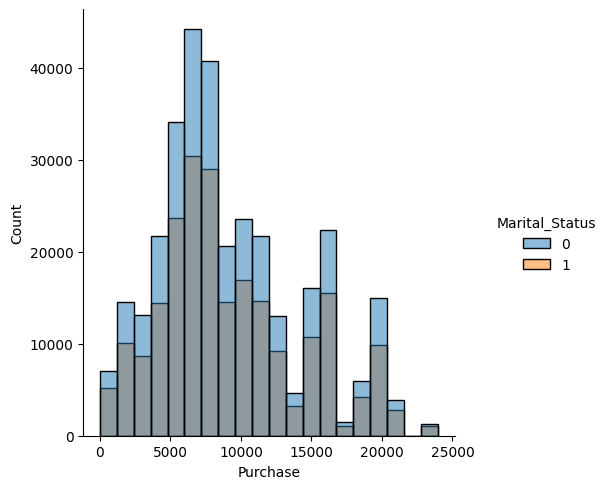

In [35]:
sns.displot(x='Purchase',hue='Marital_Status',data=df,bins=20)

Distribution of Marital Status

In [36]:
# we can do the same for Marital Status
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<Axes: xlabel='Marital_Status', ylabel='Purchase'>

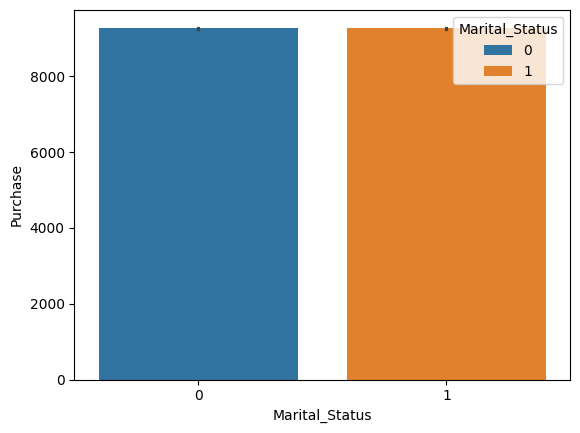

In [37]:
sns.barplot(x=df['Marital_Status'],y=df['Purchase'],hue=df['Marital_Status'])

By looking at the barplot there is not much difference between Married and Unmarried Customers on the Amount spent on their purchase.

In [38]:
# Create Separate DataFrame for Married and UnMarried Customers:
married_df = df[df['Marital_Status']==1]
unmarried_df = df[df['Marital_Status']==0]

## Create a Function to calculate the confidence Interval for Married and UnMarried Customers

In [39]:
# n --> Sample Size
# iteration --> Number of times Sampling
# ci --> Confidence Leval
def marital_status_confidenceinterval(n,iteration,ci):
  married_sample_mean=[]
  unmarried_sample_mean=[]
  for i in range(iteration):
    married_sample = married_df.sample(n)['Purchase'].mean()
    unmarried_sample = unmarried_df.sample(n)['Purchase'].mean()
    married_sample_mean.append(married_sample)
    unmarried_sample_mean.append(unmarried_sample)
  first = (100-ci)/2
  last = 100-first
  married_ci = np.percentile(married_sample_mean,[first,last])
  unmarried_ci = np.percentile(unmarried_sample_mean,[first,last])
  print(f"Unmarried: {unmarried_ci}, Married: {married_ci}")

## For Confidence level of 95%

In [40]:
# with Sample Size of 300 with iteration 1000
marital_status_confidenceinterval(300,1000,95)

Unmarried: [8759.26766667 9868.34766667], Married: [8687.24841667 9842.23133333]


with sample size of 300, the avg mean of Unmarried is between 8759 and 9868 and for married is between 8687 and 9842 .  Both the range is more or less same compare to each other.  We will further increase the sample size and confirm it.

In [41]:
# with Sample Size of 1000 with iteration 1000
marital_status_confidenceinterval(1000,1000,95)

Unmarried: [8987.41015 9600.26475], Married: [8969.497175 9558.143475]


with sample size of 1000, Confidence Interval range of both married and Unmarried are same and has not much difference compare to each other.

In [42]:
# with Sample Size of 2000 with iteration 5000
marital_status_confidenceinterval(2000,5000,95)

Unmarried: [9046.949475 9488.27415 ], Married: [9044.9783875 9480.8302375]


Even after increasing the sample size to 2000 and sampling time to 5000, Confidence Interval range of both married and Unmarried has not much difference compare to each other.

## Confidence Level of - 99%

In [43]:
# with Sample Size of 1000
marital_status_confidenceinterval(1000,1000,99)

Unmarried: [8910.425455 9653.808905], Married: [8880.685045 9658.827875]


with confidence level of 99% the confidence interval range is same for both Married and Unmarried customers

## Confidence Level of - 90%

In [44]:
marital_status_confidenceinterval(1000,1000,90)

Unmarried: [8996.57565 9511.9737 ], Married: [8992.5467  9525.04405]


with confidence level of 90% the confidence interval range is same for both Married and Unmarried customers
## Hence we confirm that the Avg Spending of Married and UnMarried are same and Maritial Status has No effect on the Spending amount

# Compare the Average Purchase Amount spent of customers with different Age limit:

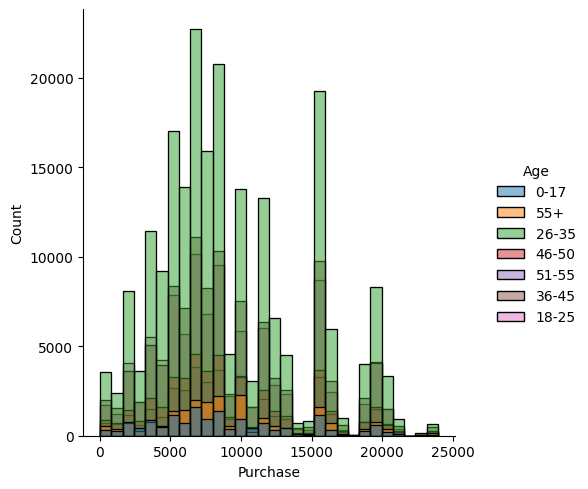

In [45]:
sns.displot(x=df['Purchase'],hue=df['Age'],bins=30)

Distribution of Purchase as per the Age Category

In [46]:
# Find the Avg Mean of all Age Category
avg_age = df.groupby('Age')['Purchase'].mean().reset_index()
avg_age

,Age,Purchase
0,0-17,8933.464640
1,18-25,9169.663606
2,26-35,9252.690633
3,36-45,9331.350695
4,46-50,9208.625697
5,51-55,9534.808031
6,55+,9336.280459


<Axes: xlabel='Age', ylabel='Purchase'>

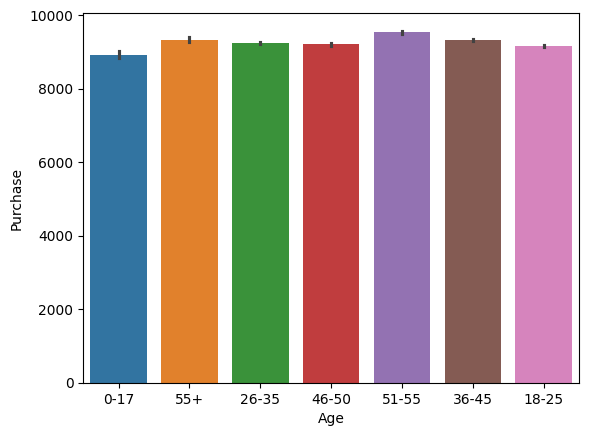

In [47]:
sns.barplot(x='Age',y='Purchase',data=df,hue='Age')

As per the barplot the total Purchase amount spent is low for age below 17 and high for age above 51 and between 18 to 50 its almost at the same level, even comparing the average amount spent, 0 to 17 age is the lowest and above 51 is the highest.

In [48]:
# Identify how many unique categories are there in Age column
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

Create separate Data Frames as per the Required Age Category - combine age of 36-45 and 46-50 in to one category and from age 51 and above combine to above 51+

In [49]:
# we need to compare Age category - 0-17, 18-25, 26-35, 36-50, 51+
df_17 = df[df['Age']=='0-17']
df_18to25 = df[df['Age']=='18-25']
df_26to35 = df[df['Age']=='26-35']
df_36to50 = df[(df['Age']=='36-45')|(df['Age']=='46-50')]
df_51plus = df[(df['Age']=='51-55')|(df['Age']=='55+')]

# Create Function to calculate the confidence Interval for different Age category for given Sample size, sampling times and confidence level

In [50]:

def Age_confidenceinterval(n,iteration,ci):
  age_till17_sample_mean=[]
  age18to25_sample_mean=[]
  age26to35_sample_mean=[]
  age36to50_sample_mean=[]
  age51plus_sample_mean=[]
  for i in range(iteration):
    age17_sample = df_17.sample(n)['Purchase'].mean()
    age18to25_sample = df_18to25.sample(n)['Purchase'].mean()
    age26to35_sample = df_26to35.sample(n)['Purchase'].mean()
    age36to50_sample = df_36to50.sample(n)['Purchase'].mean()
    age51plus_sample = df_51plus.sample(n)['Purchase'].mean()
  #------------------------------------------------------------#
    age_till17_sample_mean.append(age17_sample)
    age18to25_sample_mean.append(age18to25_sample)
    age26to35_sample_mean.append(age26to35_sample)
    age36to50_sample_mean.append(age36to50_sample)
    age51plus_sample_mean.append(age51plus_sample)
  first = (100-ci)/2
  last = 100-first
  age0to17_ci = np.percentile(age_till17_sample_mean,[first,last])
  age18to25_ci = np.percentile(age18to25_sample_mean,[first,last])
  age26to35_ci = np.percentile(age26to35_sample_mean,[first,last])
  age36to50_ci = np.percentile(age36to50_sample_mean,[first,last])
  age51plus_ci = np.percentile(age51plus_sample_mean,[first,last])
#---------------------------------------------------------------#
  print(f"Age 0-17: {age0to17_ci}, \n18-25: {age18to25_ci}, \n26-35: {age26to35_ci}, \n36-50: {age36to50_ci}, \nAge 51+ : {age51plus_ci}")

## Confidence Level - 95%

In [51]:
# for sample size - 300, sampling time=1000
Age_confidenceinterval(300,1000,95)

Age 0-17: [8355.981   9508.23475], 
18-25: [8612.36216667 9715.61758333], 
26-35: [8697.36266667 9789.82166667], 
36-50: [8777.7995     9867.46116667], 
Age 51+ : [ 8913.67433333 10084.038     ]


for sample size of 300, range of all category is overlapping with each other hence we have to increase the sample size more.

In [52]:
# with Sample size 500
Age_confidenceinterval(500,1000,95)

Age 0-17: [8468.7935  9398.95505], 
18-25: [8728.17795 9591.4614 ], 
26-35: [8830.75215 9639.44165], 
36-50: [8862.3868  9721.03265], 
Age 51+ : [9035.99035 9906.2894 ]


Even for sample size of 500, range of all category is overlapping with each other. Hence we can't confirm which Age Category has the higher Average amount of purchase spent.  We have to increase the sample size again

In [53]:
# with Sample size of 3
Age_confidenceinterval(1000,1000,95)

Age 0-17: [8636.380575 9224.665575], 
18-25: [8858.76375  9473.547625], 
26-35: [8946.647275 9554.30865 ], 
36-50: [8993.049125 9599.701075], 
Age 51+ : [9155.529525 9783.45465 ]


By increasing the sample size to 1000, with 1000 times sampling, still there is overlapping among all the categories.  

In [54]:
Age_confidenceinterval(2000,1000,95)

Age 0-17: [8733.539925 9145.90815 ], 
18-25: [8941.000075  9397.6410375], 
26-35: [9035.88925 9465.0141 ], 
36-50: [9080.5332125 9514.9460875], 
Age 51+ : [9255.0008125 9690.3354625]


Only by increasing the sample size to 2000, with 1000 times sampling, we found that the average mean of amount spend by Age below 17 category is the lower than Age51+ category
Age from 18 to 50 category are all same with little difference

In [58]:
Age_confidenceinterval(1000,1000,90)

Age 0-17: [8684.1174 9173.1439], 
18-25: [8916.2021 9440.4143], 
26-35: [9009.43845 9526.2333 ], 
36-50: [9047.2193 9560.0957], 
Age 51+ : [9200.40145 9731.32065]


By decreasing the confidence level to 90%, we found that the average mean of amount spend by age below 17 is lower than 51+ category.  Rest all category are at the same range.

In [56]:
Age_confidenceinterval(2000,1000,90)

Age 0-17: [8760.288175 9105.81655 ], 
18-25: [8995.18295  9366.477275], 
26-35: [9060.416075 9425.8737  ], 
36-50: [9114.89695 9480.40735], 
Age 51+ : [9287.3784 9652.1338]


By decreasing the confidence level to 90% and increasing the sample size to 2000, we found that the average mean of amount spend by age below 17 is lower than 36-50 and 51+ category.  Rest all category are at the same range.

## since Age Category below 17 is lower in sales Walmart can come up Promotions to promote people below 17yrs to purchase at Walmart.  These promotions can be,
* Discounts on Sports items
* Promotions on clothing related to teenegers
* Stationarys and Study material promotions
* Discounts on Chocolates or other Confectionery related to younger age group

# Summary:
##Gender wise comparison:

* As per the Box plot, Total Purchase Value - Gender Wise It shows male has spend more amount than Female but still we can't declare that the average spend of male is higher than female without proper analysis
* for 95% confidence Interval with sample size of 300 with confidence level of 95% for male is 8861 to 10000 and for female is 8204 to 9296. both of them are overlapping with each other
* for a sample size of 500, with 1000 times sampling, Avg mean of female lies between 8339 and 9159 and for Male is 9004 to 9882. Both the range are overlapping hence we will try to increase the sample size.
* for a sample size of 1000 with sampling times - 1000, confidence Interval - Avg mean of purchase for female lies between 8447 and 9062 and for male lies between 9120 and 9767. With this we conclude that **Male Avg spending is higher than Female**
* when we further **increase the sample size and reduce the confidence level**, the Avg mean of female lies between 8470 and 9020 and for male is between 9162 and 9686, shows that male average is higher than female

##Marital Status Comparison:

* By looking at the barplot there is not much difference between Married and Unmarried Customers on the Amount spent on their purchase.
* Even after increasing the sample size to 2000 and sampling time to 5000, Confidence Interval range of both married and Unmarried has not much difference compare to each other.
* Even with confidence level of 99% and 90% there is overlapping.  **We conclude that Marital Status has effect on the Amount spent on the Purchases**.

##Age Category Comparison:

* As per the barplot the total Purchase amount spent is low for age below 17 and high for age above 51 and between 18 to 50 its almost at the same level, even comparing the average amount spent, 0 to 17 age is the lowest and above 51 is the highest.
* Even for sample size of 500, range of all category is overlapping with each other. Hence we can't confirm which Age Category has the higher Average amount of purchase spent. We have to increase the sample size again
* By increasing the sample size to 1000, with 1000 times sampling with confidence level of 95% still there is overlapping among all the categories.
* **Only by increasing the sample size to 2000**, with 1000 times sampling with confidence level of 95% we found that **the average mean of amount spend by Age below 17 category is the lower than Age51+ category**
* **By decreasing the confidence level to 90%, we found that the average mean of amount spend by age below 17 is lower than 36-50 and 51+ category**. Rest all category are at the same range.
* **By decreasing the confidence level to 90% and increasing the sample size to 2000, we found that the average mean of amount spend by age below 17 is lower than 36-50 and 51+ category**. Rest all category are at the same range.

##Recommendations:
### Since Femal customer Spending is lower than Male customers, few suggestions and recommendations are mentioned below,
* Use targeted discounts and coupon bundles based on female customers' purchase history
* Create themed campaigns and app sections tailored to women's lifestyles like self-care and wellness
* Optimize walmart mobie apps to add features like virtual try-on for fashion(clothing)
* Run A/B tests on promotions, product placements, and pricing strategies to find what boosts female customer spending.

### Age Group - Average Spending of Customers who are less than 17yrs is less compare to other age groups, hence few suggestions and recommendations are mentioned below,
* By increasing the stocks which are trendy, affordable in categories like tech accessories, toys, school supplies, clothing etc.
* Partner with teen favourite brands like Marvel, DC, LEGO, BTS to increase the sales
* Use platforms like youtube, ticktok etc to promote products with teen friendly influencers and creators
* Offer back to school promotions, weekend snack packs or group deals to encourage parents to spend more when shopping with their kids.
* Add kids friendly zone, gaming zones to drive and increase the foot traffic and engagement
